<h3>Data Upload

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
pd.set_option('max_columns',None)
df=pd.read_csv('loan.csv')

C:\Users\wangj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df=df[df['loan_status']!='Does not meet the credit policy. Status:Fully Paid']
df=df[df['loan_status']!='Does not meet the credit policy. Status:Charged Off']

<h3>Product Information

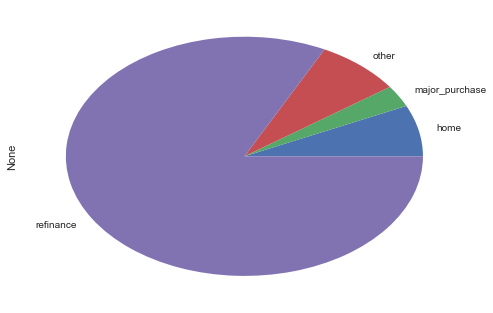

In [4]:
def purpose_class(text):
    if text=='debt_consolidation' or text=='credit_card':
        return 'refinance'
    elif text=='house' or text=='home_improvement' or text=='renewable_energy' or text=='moving':
        return 'home'
    elif text=='car' or text=='major_purchase':
        return 'major_purchase'
    else:
        return 'other'

df['purpose_class']=df['purpose'].apply(purpose_class)
purpose_group = df.groupby('purpose_class')
purpose_group.size().plot(kind='pie')

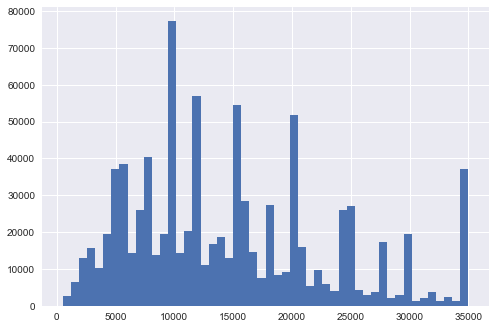

In [5]:
df['loan_amnt'].hist(bins=50)

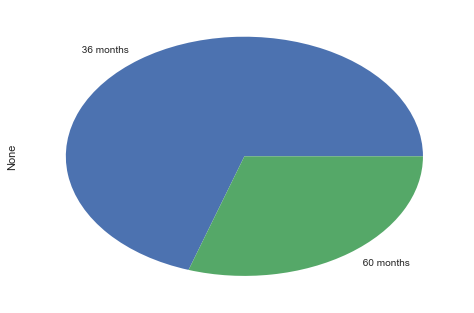

In [6]:
term_group = df.groupby('term')
term_group.size().plot(kind='pie')

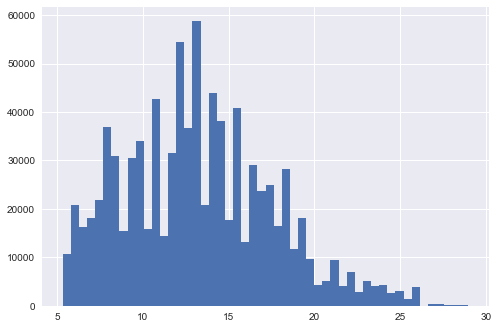

In [7]:
df['int_rate'].hist(bins=50)

<h3>Client Information

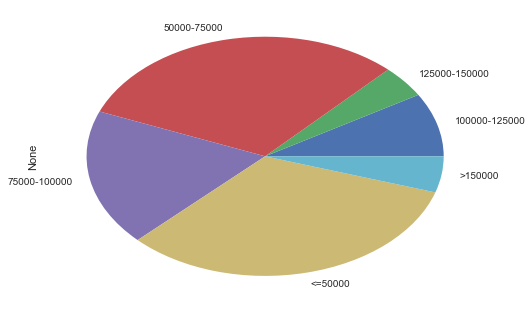

In [8]:
def inc_class(num):
    if num <= 50000:
        return '<=50000'
    elif num <= 75000:
        return '50000-75000'
    elif num <= 100000:
        return '75000-100000'
    elif num <= 125000:
        return '100000-125000'
    elif num <= 150000:
        return '125000-150000'
    else:
        return '>150000'

df['inc_class']=df['annual_inc'].apply(inc_class)
inc_class = df.groupby('inc_class')
inc_class.size().plot(kind='pie')

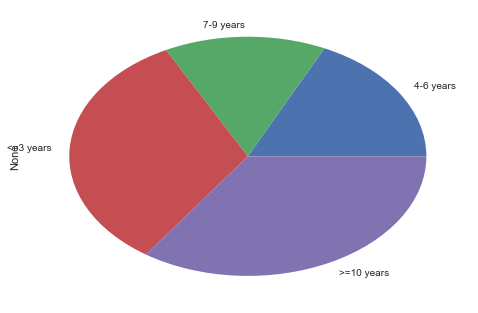

In [9]:
def emp_length_class(text):
    if text=='< 1 year' or text=='1 year' or text=='2 years' or text=='3 years':
        return '<=3 years'
    elif text=='4 years' or text=='5 years' or text=='6 years':
        return '4-6 years'
    elif text=='7 years' or text=='8 years' or text=='9 years':
        return '7-9 years'
    elif text=='10+ years':
        return '>=10 years'
    else:
        return None
    
df['emp_length_class']=df['emp_length'].apply(emp_length_class)
emp_length_class = df.groupby('emp_length_class')
emp_length_class.size().plot(kind='pie')

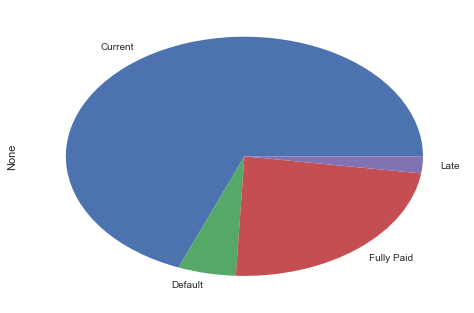

In [14]:
def status_class(text):
    if text=='Fully Paid':
        return 'Fully Paid'
    elif text=='Charged Off' or text=='Default':
        return 'Default'
    elif text=='Current' or text=='Issued':
        return 'Current'
    else:
        return 'Late'
    
df['status_class']=df['loan_status'].apply(status_class)
status_group = df.groupby('status_class')
status_group.size().plot(kind='pie')

<h3>Credit Grade

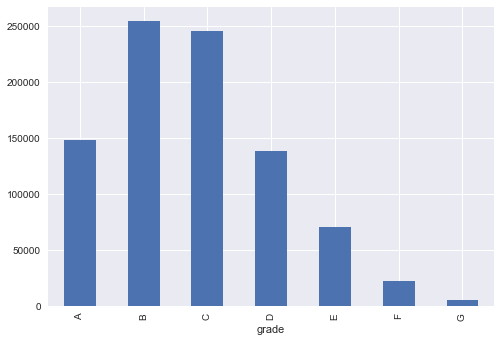

In [9]:
grade_group = df.groupby('grade')
grade_group.size().plot(kind='bar')

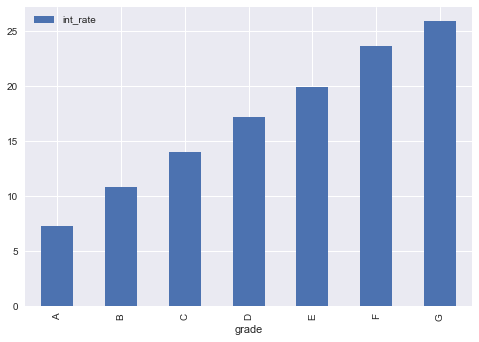

In [12]:
interest_group = df[['grade','int_rate']].groupby('grade')
interest_group.mean().plot(kind='bar')

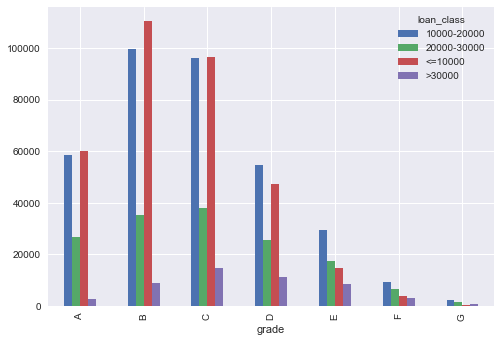

In [10]:
def loan_class(num):
    if num <= 10000:
        return '<=10000'
    elif num <= 20000:
        return '10000-20000'
    elif num <= 30000:
        return '20000-30000'
    else:
        return '>30000'
    
df['loan_class']=df['loan_amnt'].apply(loan_class)
grade_loan_class = df.groupby(['grade','loan_class'])
grade_loan_class.size().unstack().plot(kind='bar')

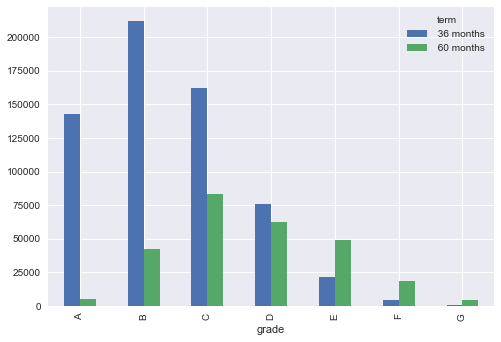

In [11]:
grade_term = df.groupby(['grade','term'])
grade_term.size().unstack().plot(kind='bar')

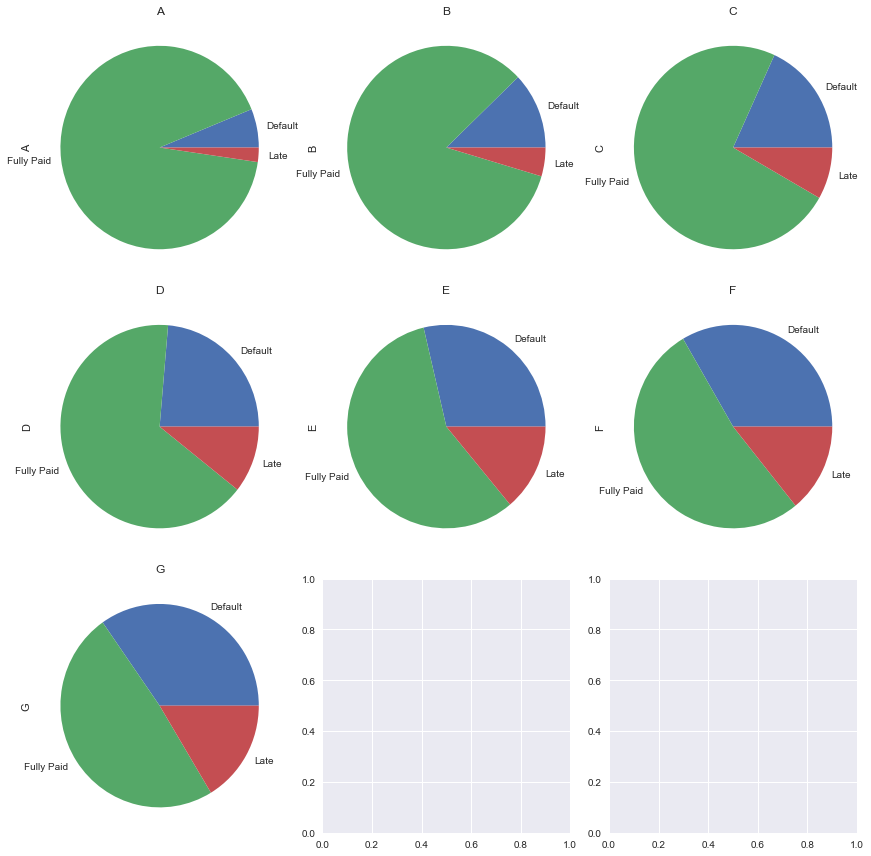

In [15]:
grade_status = df[df['status_class']!='Current'].groupby(['status_class','grade']).size().unstack()
COL_NUM = 3
ROW_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i, (grade, status_count) in enumerate(grade_status.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    status_count.plot(kind='pie', ax=ax)
    ax.set_title(grade)

plt.tight_layout()

<h3>Machine Learning

In [4]:
df=df.drop(['id','member_id','funded_amnt','funded_amnt_inv','sub_grade','int_rate','emp_title','issue_d','zip_code',
            'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
            'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','desc','url','title',
            'initial_list_status'],axis=1)

In [5]:
def status_binary(text):
    if text=='Fully Paid':
        return 0
    elif text=='Current' or text=='Issued':
        return -1
    else:
        return 1
    
df['loan_status']=df['loan_status'].apply(status_binary)
df=df[df['loan_status']!=-1]

In [5]:
for col in df.columns:
    if len(df[col].unique())<4:
        print(df[col].value_counts())
        print('\n')

 36 months    209857
 60 months     64534
Name: term, dtype: int64


Verified           100925
Not Verified        90739
Source Verified     82727
Name: verification_status, dtype: int64


0    207723
1     66668
Name: loan_status, dtype: int64


n    274384
y         7
Name: pymnt_plan, dtype: int64


1.0    274391
Name: policy_code, dtype: int64


INDIVIDUAL    274385
JOINT              6
Name: application_type, dtype: int64




In [6]:
df=df.drop(['pymnt_plan','policy_code','application_type'],axis=1)

In [7]:
df=df.drop(['earliest_cr_line','last_credit_pull_d','addr_state'],axis=1)
df=df.dropna(thresh=len(df)/10,axis=1)
df=df.dropna()

In [8]:
def purpose_class(text):
    if text=='debt_consolidation' or text=='credit_card':
        return 'refinance'
    elif text=='house' or text=='home_improvement' or text=='renewable_energy' or text=='moving':
        return 'home'
    elif text=='car' or text=='major_purchase':
        return 'major_purchase'
    else:
        return 'other'

df['purpose']=df['purpose'].apply(purpose_class)

In [9]:
dummy_df=pd.get_dummies(df[['home_ownership','verification_status','purpose','term']])
df=df.drop(['home_ownership','verification_status','purpose','term'],axis=1)
df=pd.concat([df,dummy_df],axis=1)

In [10]:
mapping_dict={
    'emp_length':{
        '10+ years':10,
        '9 years':9,
        '8 years':8,
        '7 years':7,
        '6 years':6,
        '5 years':5,
        '4 years':4,
        '3 years':3,
        '2 years':2,
        '1 year':1,
        '< 1 year':0,
        'n/a':0
    },
    'grade':{
        'A':1,
        'B':2,
        'C':3,
        'D':4,
        'E':5,
        'F':6,
        'G':7,
    }
}
df=df.replace(mapping_dict)

In [11]:
cols = list(df)
cols.insert(0, cols.pop(cols.index('loan_status')))
df = df.ix[:, cols]

<h3>Decision Tree

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)
x_train = train.iloc[0:,1:34]
y_train = train[['loan_status']]
x_test = test.iloc[0:,1:34]
y_test = test[['loan_status']]

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 3,criterion='entropy',class_weight={0: 0.15, 1: 0.85})
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

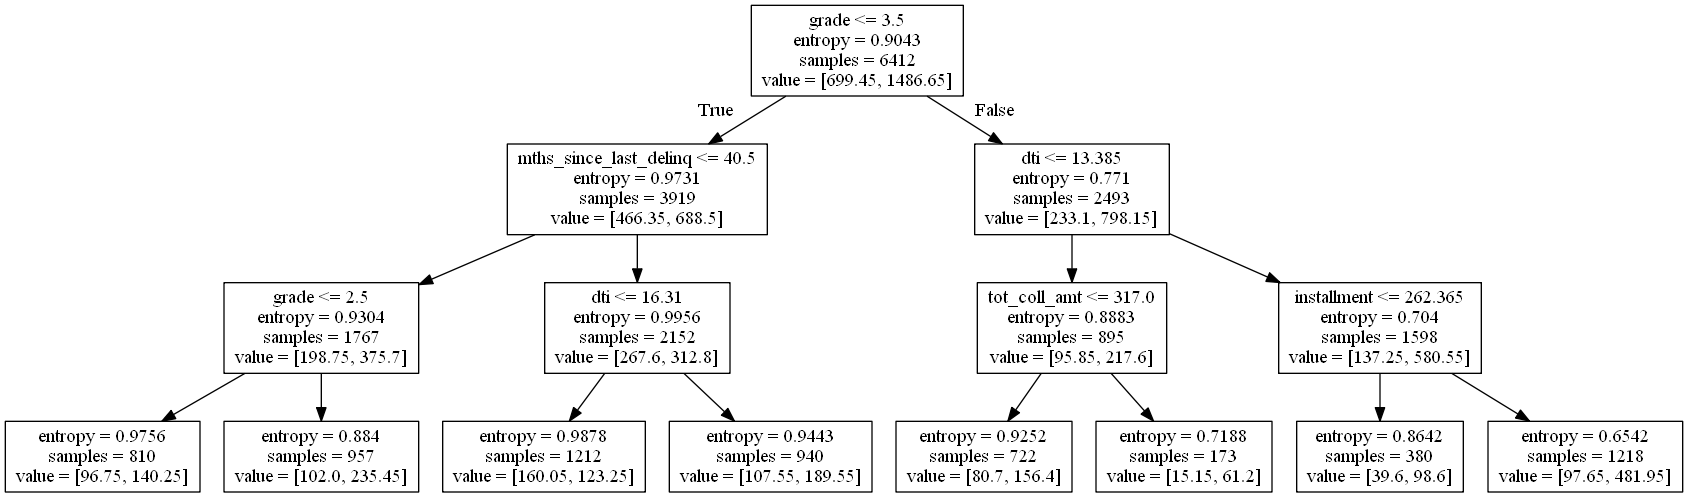

In [29]:
import pydotplus 
feature_names = [key for key in df if not key=='loan_status']
from IPython.display import Image
dot_data = tree.export_graphviz(model, out_file=None,feature_names=feature_names)
import pydotplus
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np
p_train=model.predict(x_train)
p_test = model.predict(x_test)

fully_paid,default = confusion_matrix(p_train,np.array(y_train))
print('The confusion matrix for training data:')
print(confusion_matrix(p_train,np.array(y_train)))
print('The portion of predicted fully paid loans that will default: {:.2f}%'.format(100*fully_paid[1]/(fully_paid[0]+fully_paid[1])))
print('The portion of default loans that are correctly identified: {:.2f}%'.format(100*default[1]/(default[1]+fully_paid[1])))

fully_paid,default = confusion_matrix(p_test,np.array(y_test))
print('The confusion matrix for testing data:')
print(confusion_matrix(p_test,np.array(y_test)))
print('The portion of predicted fully paid loans that will default: {:.2f}%'.format(100*fully_paid[1]/(fully_paid[0]+fully_paid[1])))
print('The portion of default loans that are correctly identified: {:.2f}%'.format(100*default[1]/(default[1]+fully_paid[1])))

The confusion matrix for training data:
[[1067  145]
 [3596 1604]]
The portion of predicted fully paid loans that will default: 11.96%
The portion of default loans that are correctly identified: 91.71%
The confusion matrix for testing data:
[[ 495   86]
 [1512  655]]
The portion of predicted fully paid loans that will default: 14.80%
The portion of default loans that are correctly identified: 88.39%


<h3>Random Forests

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight={0: 0.15, 1: 0.85})
model.fit(x_train,np.ravel(y_train))

RandomForestClassifier(bootstrap=True, class_weight={0: 0.15, 1: 0.85},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
from sklearn.metrics import confusion_matrix
p_train=model.predict(x_train)
p_test = model.predict(x_test)

fully_paid,default = confusion_matrix(p_train,np.array(y_train))
print('The confusion matrix for training data:')
print(confusion_matrix(p_train,np.array(y_train)))
print('The portion of predicted fully paid loans that will default: {:.2f}%'.format(100*fully_paid[1]/(fully_paid[0]+fully_paid[1])))
print('The portion of default loans that are correctly identified: {:.2f}%'.format(100*default[1]/(default[1]+fully_paid[1])))

fully_paid,default = confusion_matrix(p_test,np.array(y_test))
print('The confusion matrix for testing data:')
print(confusion_matrix(p_test,np.array(y_test)))
print('The portion of predicted fully paid loans that will default: {:.2f}%'.format(100*fully_paid[1]/(fully_paid[0]+fully_paid[1])))
print('The portion of default loans that are correctly identified: {:.2f}%'.format(100*default[1]/(default[1]+fully_paid[1])))

The confusion matrix for training data:
[[4663  158]
 [   0 1591]]
The portion of predicted fully paid loans that will default: 3.28%
The portion of default loans that are correctly identified: 90.97%
The confusion matrix for testing data:
[[1923  663]
 [  84   78]]
The portion of predicted fully paid loans that will default: 25.64%
The portion of default loans that are correctly identified: 10.53%


<h3>Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
import numpy as np
model = LogisticRegression(class_weight={0: 0.15, 1: 0.85})
model.fit(x_train, np.ravel(y_train))

LogisticRegression(C=1.0, class_weight={0: 0.15, 1: 0.85}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [23]:
from sklearn.metrics import confusion_matrix
p_train=model.predict(x_train)
p_test = model.predict(x_test)

fully_paid,default = confusion_matrix(p_train,np.array(y_train))
print('The confusion matrix for training data:')
print(confusion_matrix(p_train,np.array(y_train)))
print('The portion of predicted fully paid loans that will default: {:.2f}%'.format(100*fully_paid[1]/(fully_paid[0]+fully_paid[1])))
print('The portion of default loans that are correctly identified: {:.2f}%'.format(100*default[1]/(default[1]+fully_paid[1])))

fully_paid,default = confusion_matrix(p_test,np.array(y_test))
print('The confusion matrix for testing data:')
print(confusion_matrix(p_test,np.array(y_test)))
print('The portion of predicted fully paid loans that will default: {:.2f}%'.format(100*fully_paid[1]/(fully_paid[0]+fully_paid[1])))
print('The portion of default loans that are correctly identified: {:.2f}%'.format(100*default[1]/(default[1]+fully_paid[1])))

The confusion matrix for training data:
[[ 561   65]
 [4102 1684]]
The portion of predicted fully paid loans that will default: 10.38%
The portion of default loans that are correctly identified: 96.28%
The confusion matrix for testing data:
[[ 274   27]
 [1733  714]]
The portion of predicted fully paid loans that will default: 8.97%
The portion of default loans that are correctly identified: 96.36%


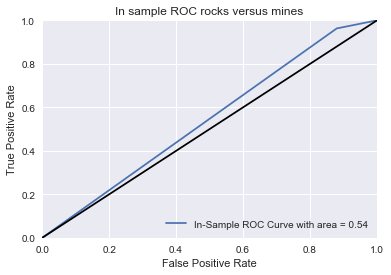

In [24]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_train,p_train)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="In-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()